In [1]:
%matplotlib inline

# Calibrate Herschel PACS and SPIRE 1-D spectra for semi-extended objects

## PACS

In [2]:
from pacs_weight import pacs_weight
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii, fits

In [3]:
outdir = '/Users/yaolun/bhr71/best_calibrated/'
cubedir = '/Users/yaolun/bhr71/data/HSA/'
photpath = '/Users/yaolun/bhr71/best_calibrated/bhr71.txt'
obj = 'BHR71'
#####
outdir = '/Users/yaolun/test/B335/'
cubedir = '/Users/yaolun/test/B335/'
photpath = '/Users/yaolun/data/herschel_phot/b335.txt'
obj = 'B335'

### From rebinned cube to 1-D spectra

In [4]:
cubefile = [cubedir+obj+'_rebinnedcube_blue1.fits',cubedir+obj+'_rebinnedcube_red1.fits',
            cubedir+obj+'_rebinnedcube_blue2.fits',cubedir+obj+'_rebinnedcube_red2.fits']
import pidly
idl = pidly.IDL('/Applications/exelis/idl83/bin/idl')
idl('.r /Users/yaolun/programs/line_fitting/get_pacs.pro')
idl.pro('get_pacs', outdir=cubedir, objname=obj, filename=cubefile, suffix='hsa', hsa=1)

% Compiled module: GET_PACS.
% Compiled module: GET_PACS_1D.
% Compiled module: GET_PACS_LINESCAN.
% Compiled module: READFITS.
% Compiled module: SXPAR.
% Compiled module: GETTOK.
% Compiled module: VALID_NUM.
% Compiled module: MRD_SKIP.
% Compiled module: HEADFITS.
% Compiled module: FXPOSIT.
% Compiled module: MRD_HREAD.
% Compiled module: AL_LEGEND.
% Compiled module: CGCHECKFORSYMBOLS.
% Compiled module: SETDEFAULTVALUE.
% Compiled module: CGTEXT.
% Compiled module: CGDEFCHARSIZE.
% Compiled module: SETDECOMPOSEDSTATE.
% Compiled module: DECOMPOSEDCOLOR.
% Compiled module: CGDEFAULTCOLOR.
% Compiled module: GETDECOMPOSEDSTATE.
% Compiled module: CGCOLOR24.
% Compiled module: CGPLOTS.
% Compiled module: CGCOLOR.


In [19]:
wl, flux, phot, scale = pacs_weight(cubedir+'cube/',
                obj, 31.8, photpath, outdir,
                cubedir+obj+'_rebinnedcube_blue1.fits',
                suffix='hsa', scale=False, phot=None)

Weighted spectrum saved at /Users/yaolun/test/B335/B335_pacs_weighted.txt


<Container object of 3 artists>

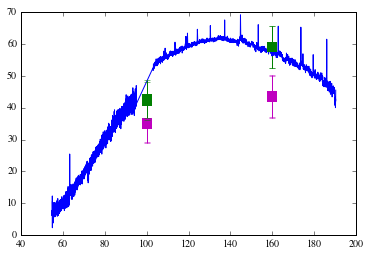

In [20]:
# B335
plt.plot(wl, flux)
plt.errorbar([100, 100, 160, 160], [34.8, 35.29, 43.39, 43.59], yerr=[5.90, 5.94, 6.59, 6.60], 
             fmt='s', color='m', linestyle='None', markersize=10, mec='None')
plt.errorbar([100, 100, 160, 160],
             [42.04, 42.63, 58.86, 59.14],
             yerr=[5.90, 5.94, 6.59, 6.60],
             fmt='s', color='g', linestyle='None', markersize=10, mec='None')

<Container object of 3 artists>

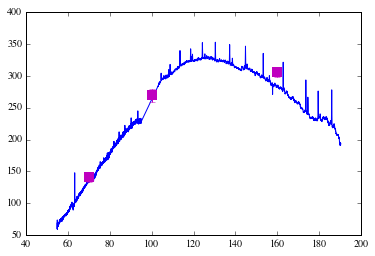

In [12]:
plt.plot(wl, flux/scale[0])
plt.errorbar([70, 100, 160], phot['flux'], yerr=phot['uncertainty'], 
             fmt='s', color='m', linestyle='None', markersize=10, mec='None')
# plt.errorbar([70, 70, 100, 100, 160, 160, 160, 160],
#              [141.89, 141.35, 269.19, 269.11, 304.91, 304.90, 305.56, 307.91],
#              yerr=[10.84, 10.82, 14.93, 14.93, 14.99, 14.99, 15.01, 15.07],
#              fmt='s', color='g', linestyle='None', markersize=10, mec='None')

### Fit the weighted PACS spectrum

In [21]:
idl('.r /Users/yaolun/programs/line_fitting/gauss.pro')
idl('.r /Users/yaolun/programs/line_fitting/extract_pacs.pro')
idl.pro('extract_pacs', indir=outdir, filename=obj+'_pacs_weighted',
        outdir=outdir+'fitting/pacs/advanced_products/',
        plotdir=outdir+'fitting/pacs/advanced_products/plots/', noiselevel=3, ra=0, dec=0, global_noise=20,
        localbaseline=10, opt_width=1, continuum=1, flat=1, object=obj, double_gauss=1, fixed_width=1)

% Compiled module: GAUSS.
% Compiled module: EXTRACT_PACS.
% Compiled module: EXTRACT_PACS_LINESCAN.
% Compiled module: READCOL.
% Compiled module: REMCHAR.
% Compiled module: STRNUMBER.
% Compiled module: INTERPOL.
% Compiled module: FIT_LINE.
% Compiled module: MPFITFUN.
% Compiled module: MPFIT.
% Compiled module: BASE2D.
% Compiled module: TITLE_NAME.
% Compiled module: READ_LINE_REF.
% Compiled module: GREEK.
% Compiled module: GAUSS_DOUBLE.
---> Re-calculating the noise level...
% Compiled module: SPEC_CONTINUUM_SMOOTH.
% Compiled module: DJS_REJECT.


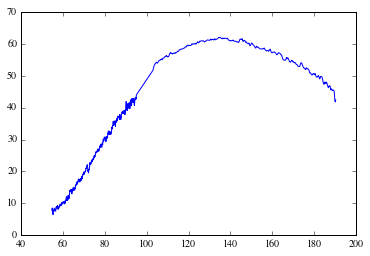

In [23]:
pacs_cont = ascii.read(outdir+'fitting/pacs/advanced_products/'+obj+'_pacs_weighted_continuum.txt')

plt.plot(pacs_cont['Wavelength(um)'], pacs_cont['Flux_Density(Jy)'])
plt.errorbar([70, 100, 160], phot['flux'], yerr=phot['uncertainty'], fmt='s', color='m', linestyle='None')

## SPIRE

### Call for HIPE

In [48]:
from subprocess import Popen, call
run = call(['hipe','/Users/programs/spectra_analysis/bhr71_sect_phot.py'])
run.communicate()

OSError: [Errno 2] No such file or directory

### Read in the SECT-calibrated spectrum and get the spectral indice

250 1.55440310745
350 1.96513734687
500 2.29725331843


/Users/yaolun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in divide
/Users/yaolun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in divide
/Users/yaolun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in divide
/Users/yaolun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in divide


(400, 2000)

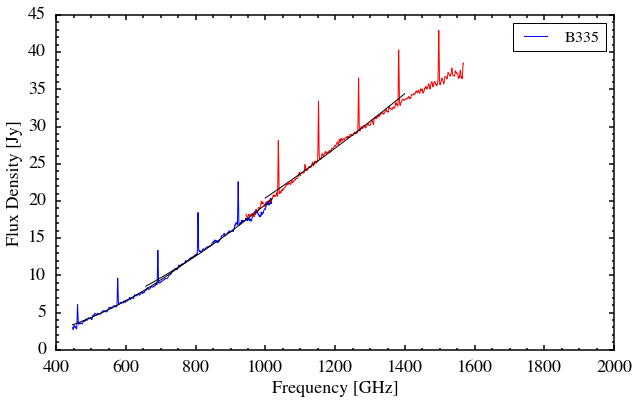

In [26]:
# Note that the spectral index works in frequency
from astropy.modeling import models, fitting, powerlaws
from scipy.interpolate import interp1d
import astropy.constants as const
c = const.c.cgs.value

# read in the spectrum
spire_spec = ascii.read(outdir+'spire_sect.txt', data_start=4)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

spire, = ax.plot(c/1e5/spire_spec['wave_segm1_0'], spire_spec['flux_segm1_0'], linewidth=1, color='b')
ax.plot(c/1e5/spire_spec['wave_segm2_0'], spire_spec['flux_segm2_0'], linewidth=1, color='r')

f_ssw = interp1d(c/1e5/spire_spec['wave_segm2_0'], spire_spec['flux_segm2_0'])
f_slw = interp1d(c/1e5/spire_spec['wave_segm1_0'], spire_spec['flux_segm1_0'])
fitted_alpha = []

for band in [250, 350, 500]:
    x_ref = c/1e5/band
    if band != 250:
        amp = f_slw(x_ref)
        freq_dum = (c/1e5/spire_spec['wave_segm1_0'])\
                   [(c/1e5/spire_spec['wave_segm1_0'] >= x_ref-200) & (c/1e5/spire_spec['wave_segm1_0'] <= x_ref+200)]
        flux_dum = spire_spec['flux_segm1_0']\
                   [(c/1e5/spire_spec['wave_segm1_0'] >= x_ref-200) & (c/1e5/spire_spec['wave_segm1_0'] <= x_ref+200)]
    else:
        amp = f_ssw(x_ref)
        freq_dum = (c/1e5/spire_spec['wave_segm2_0'])\
                   [(c/1e5/spire_spec['wave_segm2_0'] >= x_ref-200) & (c/1e5/spire_spec['wave_segm2_0'] <= x_ref+200)]
        flux_dum = spire_spec['flux_segm2_0']\
                   [(c/1e5/spire_spec['wave_segm2_0'] >= x_ref-200) & (c/1e5/spire_spec['wave_segm2_0'] <= x_ref+200)]
    alpha = 0
    
    pow_model = powerlaws.PowerLaw1D(amp, x_ref, alpha)
    fitter = fitting.LevMarLSQFitter()
    fit = fitter(pow_model, freq_dum, flux_dum)
    ax.plot(freq_dum, fit(freq_dum), '-', color='k')
    # take negative sign because the frequency array is reversed
    fitted_alpha.append(-fit.alpha.value)
    print band, -fit.alpha

ax.legend([spire], [r'$\rm{'+obj+'}$'], fontsize=16, loc='best')

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
ax.set_xlabel('Frequency [GHz]', fontsize=18)
ax.set_ylabel('Flux Density [Jy]', fontsize=18)
ax.set_xlim([400,2000])

<Container object of 3 artists>

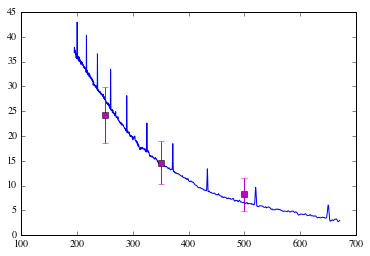

In [29]:
# read in the spectrum
spire_spec = ascii.read(outdir+'spire_sect.txt', data_start=4)
# convert it to the usual format
spire_wl = np.hstack((spire_spec['wave_segm1_0'][spire_spec['wave_segm1_0'] >= 310].data,
            spire_spec['wave_segm2_0'][(spire_spec['wave_segm2_0'] < 310) & (spire_spec['wave_segm2_0'] > 195)].data))
spire_flux = np.hstack((spire_spec['flux_segm1_0'][spire_spec['wave_segm1_0'] >= 310].data,
            spire_spec['flux_segm2_0'][(spire_spec['wave_segm2_0'] < 310) & (spire_spec['wave_segm2_0'] > 195)].data))

sorter = np.argsort(spire_wl)
spire_wl = spire_wl[sorter].data
spire_flux = spire_flux[sorter].data

# Write to file
foo = open(outdir+obj+'_spire_corrected.txt','w')
foo.write('%s \t %s \n' % ('Wavelength(um)', 'Flux_Density(Jy)'))
for i in range(len(spire_wl)):
    foo.write('%f \t %f \n' % (spire_wl[i], spire_flux[i]))
foo.close()

# read in the photometry
spire_phot = ascii.read(outdir+'phot_sect.txt', data_start=4)

plt.plot(spire_wl, spire_flux)
plt.errorbar(spire_phot['wavelength(um)'], spire_phot['flux(Jy)'], yerr=spire_phot['uncertainty(Jy)'],
             fmt='s', color='m', linestyle='None')

In [30]:
idl('.r /Users/yaolun/programs/line_fitting/gauss.pro')
idl('.r /Users/yaolun/programs/line_fitting/extract_spire.pro')
idl.pro('extract_spire', indir=outdir, filename=obj+'_spire_corrected',
        outdir=outdir+'fitting/spire/advanced_products/',
        plotdir=outdir+'fitting/spire/advanced_products/plots/', noiselevel=3, ra=0, dec=0, global_noise=20,
        localbaseline=10, continuum=1, flat=1, object=obj, double_gauss=1, fx=1)

% Compiled module: GAUSS.
% Procedure was compiled while active: EXTRACT_SPIRE. Returning.
% Compiled module: EXTRACT_SPIRE.
---> Re-calculating the noise level...
% Compiled module: CLEANPLOT.


<Container object of 3 artists>

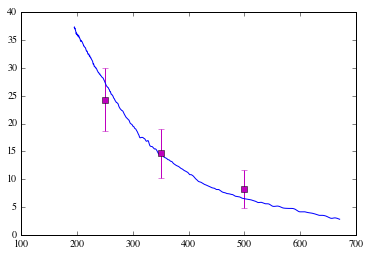

In [31]:
spire_cont = ascii.read(outdir+'fitting/spire/advanced_products/'+obj+'_spire_corrected_continuum.txt')

plt.plot(spire_cont['Wavelength(um)'], spire_cont['Flux_Density(Jy)'])
plt.errorbar(spire_phot['wavelength(um)'], spire_phot['flux(Jy)'], yerr=spire_phot['uncertainty(Jy)'],
             fmt='s', color='m', linestyle='None')

<Container object of 3 artists>

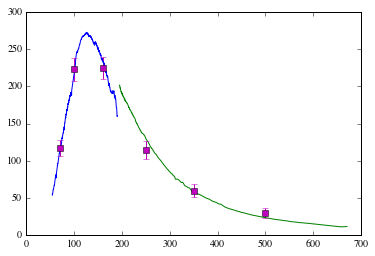

In [52]:
plt.plot(pacs_cont['Wavelength(um)'], pacs_cont['Flux_Density(Jy)'])
plt.errorbar([70, 100, 160], phot['flux'], yerr=phot['uncertainty'], fmt='s', color='m', linestyle='None')

plt.plot(spire_cont['Wavelength(um)'], spire_cont['Flux_Density(Jy)'])
plt.errorbar(spire_phot['wavelength(um)'], spire_phot['flux(Jy)'], yerr=spire_phot['uncertainty(Jy)'],
             fmt='s', color='m', linestyle='None')